# Trabalho 4 (Transformada)
Descrição do trabalho:

http://webserver2.tecgraf.puc-rio.br/~mgattass/visao/trb/T4.html

Aluno: Daniel da Silva Costa

E-mail: danieldasilvacosta@gmail.com

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
cd "drive/MyDrive/Doutorado/Disciplinas/[2022.2] [PUC-Rio] Visão Computacional - Professor: Marcelo Gattass/Trabalhos/Trabalho 4 - Transformada/"

/content/drive/MyDrive/Doutorado/Disciplinas/[2022.2] [PUC-Rio] Visão Computacional - Professor: Marcelo Gattass/Trabalhos/Trabalho 4 - Transformada


In [3]:
!pwd

/content/drive/MyDrive/Doutorado/Disciplinas/[2022.2] [PUC-Rio] Visão Computacional - Professor: Marcelo Gattass/Trabalhos/Trabalho 4 - Transformada


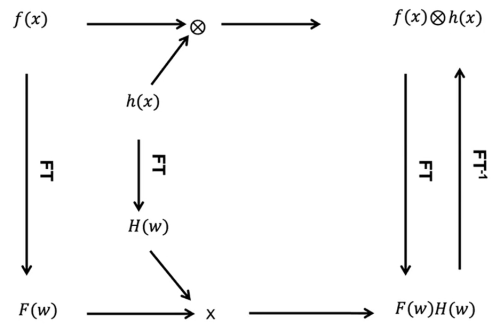

### Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import fftpack
from scipy import signal
import math

### 1. Implemente uma transformada de Fourier.

Baseado em: "Understanding the FFT Algorithm"

https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/

#### DFT

In [5]:
def DFT(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [6]:
type(1j) # Número complexo em Python

complex

In [7]:
type(-2j)

complex

#### Conferindo se os valores calculados pela função DFT_slow estão corretos em comparação com a biblioteca do Numpy.

In [8]:
x = np.random.random(1024)
x

array([0.14699814, 0.22769426, 0.60262498, ..., 0.73268409, 0.02470167,
       0.05563819])

In [9]:
DFT(x)

array([519.56602897+0.j        ,  -5.2956071 -3.51852561j,
         3.98644298-6.25307457j, ...,  -2.63854126+4.14310657j,
         3.98644298+6.25307457j,  -5.2956071 +3.51852561j])

In [10]:
np.allclose(DFT(x), np.fft.fft(x))

True

#### Comparando o tempo de execução da implementação da função "slow DFT" com a FFT (do Numpy).

In [11]:
%timeit DFT(x)
%timeit np.fft.fft(x)

134 ms ± 9.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
10.9 µs ± 424 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### FFT

Radix-2 Cooley-Tukey FFT: O tamanho do *array* deve ser uma potência de 2.

In [12]:
def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  # this cutoff should be optimized
        return DFT(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N // 2] * X_odd,
                               X_even + factor[N // 2:] * X_odd])

#### Conferindo se os valores calculados pela função FFT estão corretos em comparação com a biblioteca do Numpy.

In [13]:
x = np.random.random(1024)
x

array([0.59095089, 0.52801728, 0.11093174, ..., 0.69496338, 0.05535606,
       0.69615214])

In [14]:
fft_x = FFT(x)
fft_x

array([518.23639126+0.j        ,   8.12237667-5.43987844j,
        -2.18893703+3.96699267j, ...,  -3.75811927-9.22322161j,
        -2.18893703-3.96699267j,   8.12237667+5.43987844j])

In [15]:
np.allclose(FFT(x), np.fft.fft(x))

True

#### Comparando o tempo de execução da implementação da função FFT_vectorized com a FFT (do Numpy).

In [16]:
%timeit DFT(x)
%timeit FFT(x)
%timeit np.fft.fft(x)

87.1 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.36 ms ± 43.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.8 µs ± 255 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### Transformada da função *seno*

In [17]:
# # Baseado em https://appgametutoriales.com/en/python-math-sin-cos-tangent/

# grados = []
# seno = []
# coseno = []
# tangente = []

# for i in range(0, 360): # 512
#   grados.append(i)
#   radianes = (i* math.pi)/180
#   seno.append(math.sin(radianes))
#   coseno.append(math.cos(radianes))
#   tangente.append(math.tan(radianes))
  
# plt.ylim(-2,2)
# plt.plot(grados, seno, "r")
# # plt.plot(grados,coseno,"b")
# # plt.plot(grados,tangente, 'g')
# plt.axhline( 0, color='gray')
# plt.axvline( 0, color='gray')
# plt.show()

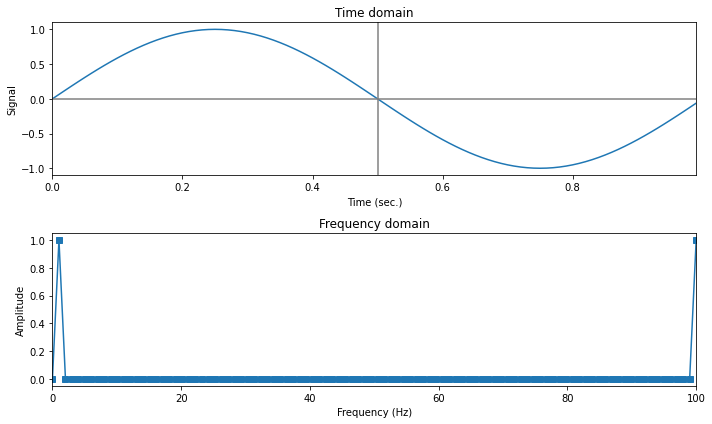

In [18]:
# Baseado em https://www.udemy.com/course/fourier-transform-mxc/

srate = 100
time = np.arange(0, 1, 1.0 / srate) # [0, 1)
n = len( time )
hz = np.linspace(0, srate, n) # [0, 100)
# sinal = np.sin( 2 * np.pi * 5 * time) # pure sine wave
sinal = np.sin( 2 * np.pi * 1 * time) # pure sine wave
dft_sinal = DFT( sinal )
ampl = 2 * np.abs( dft_sinal / n )

fig,ax = plt.subplots(2,1,figsize=(10,6))
ax[0].plot( time, sinal )
ax[0].set_xlabel('Time (sec.)')
ax[0].set_ylabel('Signal')
ax[0].set_title('Time domain')
ax[0].set_xlim(time[[0,-1]])
ax[0].axhline( 0, color='gray')
ax[0].axvline( 0.5, color='gray')

ax[1].plot( hz, ampl, 's-')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Frequency domain')
ax[1].set_xlim([0,100])

plt.tight_layout()
plt.show()

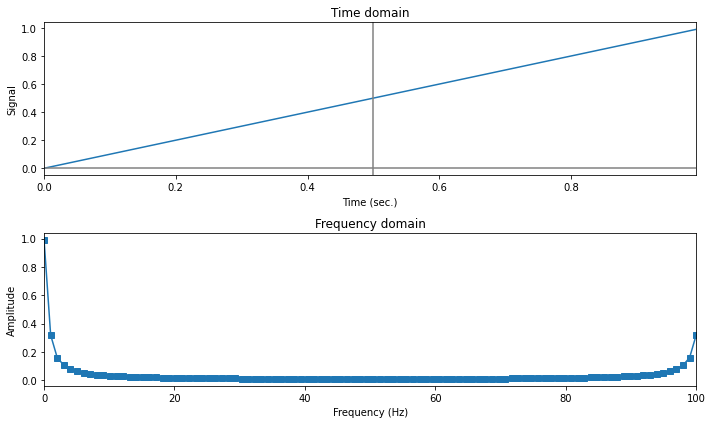

In [19]:
# Baseado em https://www.udemy.com/course/fourier-transform-mxc/

srate = 100
time = np.arange(0, 1, 1.0 / srate) # [0, 1)
n = len( time )
hz = np.linspace(0, srate, n) # [0, 100)
sinal = time
dft_sinal = DFT( sinal )
ampl = 2 * np.abs( dft_sinal / n )

fig,ax = plt.subplots(2,1,figsize=(10,6))
ax[0].plot( time, sinal )
ax[0].set_xlabel('Time (sec.)')
ax[0].set_ylabel('Signal')
ax[0].set_title('Time domain')
ax[0].set_xlim(time[[0,-1]])
ax[0].axhline( 0, color='gray')
ax[0].axvline( 0.5, color='gray')

ax[1].plot( hz, ampl, 's-')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Frequency domain')
ax[1].set_xlim([0,100])

plt.tight_layout()
plt.show()

### 2. Implemente a filtragem de uma imagem tanto com o uso de Transformada de Fourier quanto por Correlação (Convolução).

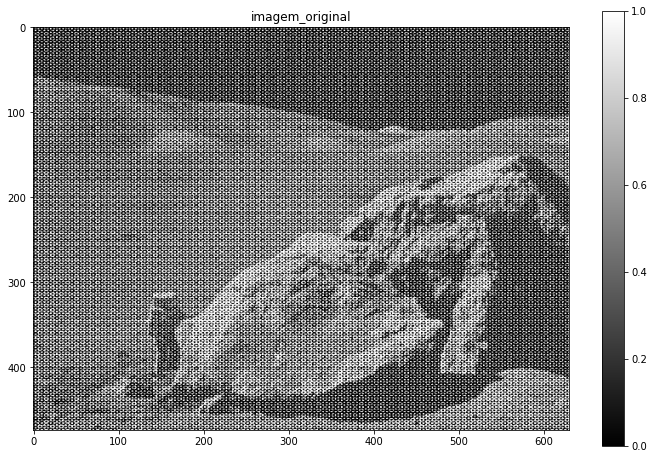

In [20]:
path = './images/'

# file = 'moonlanding.png'
file = 'moonlanding_scipy.png'
# file = 'balloons_noisy.png'

img = plt.imread( path + file ).astype(float)

def show_img( img, title ):
  plt.figure( figsize=(12,8) )
  plt.title( title )
  plt.imshow( img, plt.cm.gray )
  plt.colorbar()
  plt.savefig( title + '.png' )
  plt.show()

show_img( img, 'imagem_original' )

(474, 630)


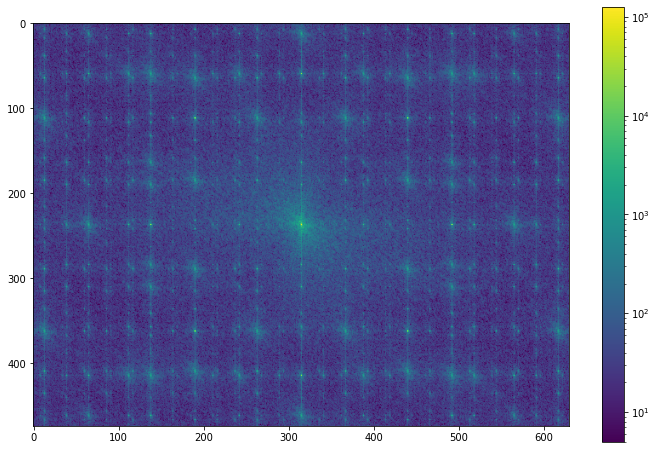

In [21]:
IMG = fftpack.fft2(img)
IMGS = fftpack.fftshift(IMG)
print(img.shape)

# Show the results
def show_spectrum(im_fft, title):
  # A lagarithmic colormap
  plt.figure(figsize=(12,8))
  plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
  plt.colorbar()
  plt.savefig(title+'png')
  plt.show()

show_spectrum(IMGS, 'Fourier transform (shifted)')

Fazendo uma convolução(correlação) com uma Gaussiana discreta de σ = 1

In [22]:
g = np.array([[0.0002, 0.0061, 0.0612, 0.2400, 0.3816, 0.2400, 0.0612, 0.0061, 0.0002]])
g2d = g*g.T

np.set_printoptions(precision=3, suppress=True, floatmode='fixed')
for i in range(9):
  print(f'{g2d[i]}')

[0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
[0.000 0.000 0.000 0.001 0.002 0.001 0.000 0.000 0.000]
[0.000 0.000 0.004 0.015 0.023 0.015 0.004 0.000 0.000]
[0.000 0.001 0.015 0.058 0.092 0.058 0.015 0.001 0.000]
[0.000 0.002 0.023 0.092 0.146 0.092 0.023 0.002 0.000]
[0.000 0.001 0.015 0.058 0.092 0.058 0.015 0.001 0.000]
[0.000 0.000 0.004 0.015 0.023 0.015 0.004 0.000 0.000]
[0.000 0.000 0.000 0.001 0.002 0.001 0.000 0.000 0.000]
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]


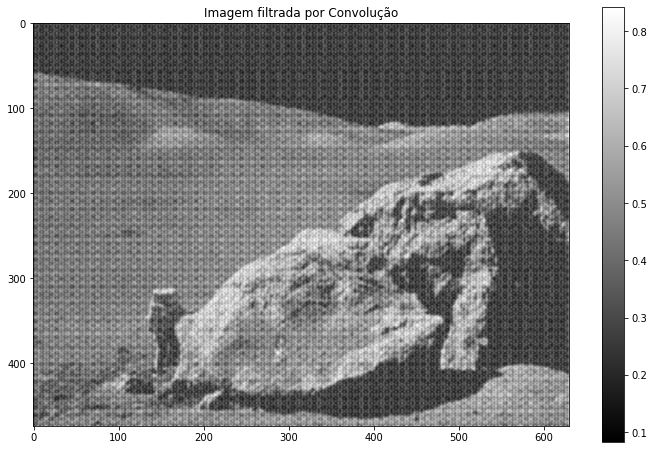

In [23]:
img_conv = signal.correlate2d(img, g2d, boundary='symm', mode='same')
show_img(img_conv, 'Imagem filtrada por Convolução')

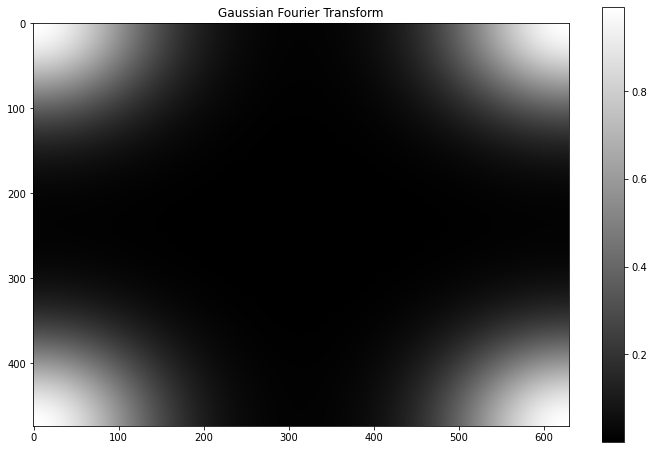

In [24]:
gauss2d = np.zeros(IMGS.shape)
h, w = IMGS.shape[:2]
yc = h//2
xc = w//2
gauss2d[yc-4:yc+5, xc-4:xc+5]=g2d
GAUSS2D = fftpack.fft2(gauss2d).real
show_img(np.abs(GAUSS2D), 'Gaussian Fourier Transform')

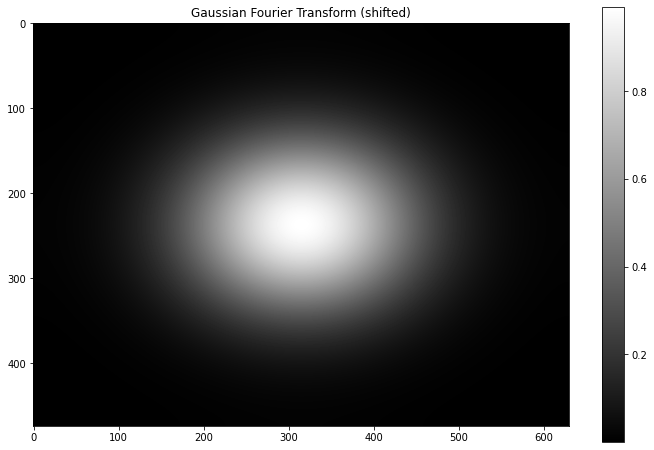

In [25]:
GAUSS2DS = fftpack.fftshift(GAUSS2D)
show_img(np.abs(GAUSS2DS), 'Gaussian Fourier Transform (shifted)')

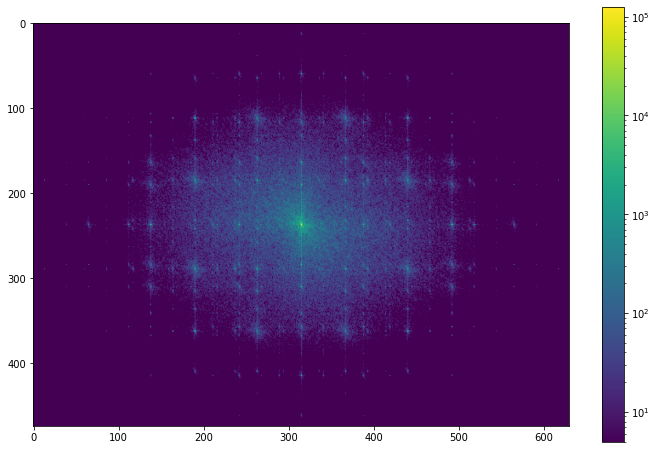

In [26]:
IMGFS = GAUSS2DS*IMGS
show_spectrum(IMGFS, 'Fourier tranform (shifted)')

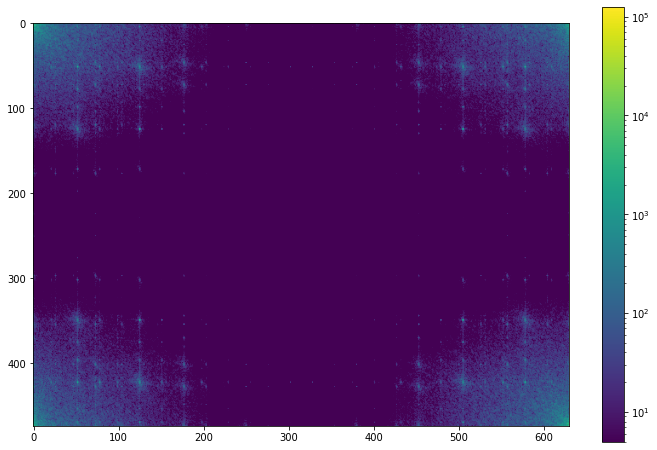

In [27]:
IMGF = fftpack.ifftshift(IMGFS)
show_spectrum(IMGF, 'Fourier tranform')

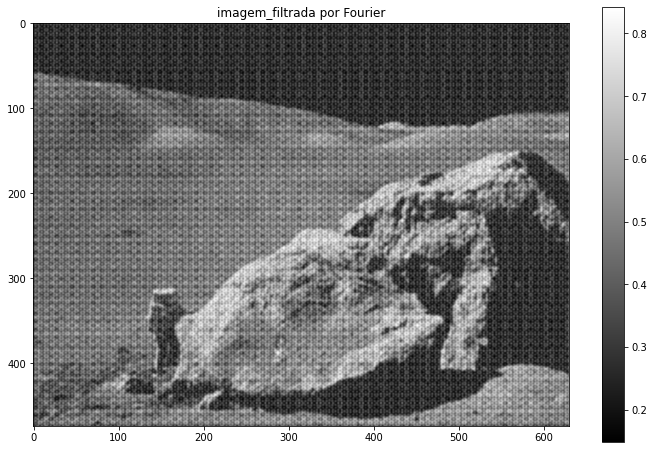

In [28]:
imgf = fftpack.ifft2(IMGF).real
imgfs = fftpack.ifftshift(imgf)
show_img(imgfs, 'imagem_filtrada por Fourier')

### 3. Mostre que a filtragem por convolução é equivalente a filtragem por Transformada de Fourier.

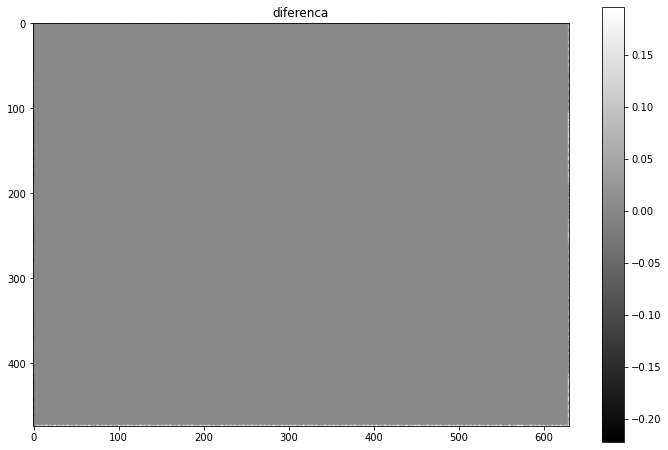

In [29]:
dif = img_conv - imgfs
show_img(dif, 'diferenca')

In [30]:
print(np.average(dif))

9.650932075021655e-17
